In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as ss
import scipy.special as sp
import theano
import pymc3 as pm
import arviz

import sys
import logging

logging.disable(logging.ERROR)


In [30]:
pm.__version__

'3.8'

In [31]:
# # We begin reading the data into a pandas dataframe.
# cookies = pd.read_csv('/home/xavier/Documents/research/FORMANRISK/data/data_formanrisk/cookies.dat', sep=' ')
# cookies.shape

In [32]:
# model = pm.Model()

# with model:
    
#     # Prior distribution for mu.
#     mu = pm.Gamma('mu', alpha=2.0, beta=1.0/5)
    
#     # Prior distribution for sigma2.
#     sigma = pm.Exponential('sigma', 1.0)
    
#     # Parametrization for the shape parameter.
#     alpha =  mu**2/sigma**2
    
#     # Parametrization for the scale parameter.
#     beta = mu/sigma**2
    
#     # Prior distribution for lambda.
#     lam = pm.Gamma(
#         'lam', 
#         alpha=alpha, 
#         beta=beta, 
#         shape=cookies.location.values.max()
#     )
    
#     # Likelihood function for the data.
#     chips = [
#         pm.Poisson('chips_{}'.format(i),lam[i], 
#         observed=cookies[cookies.location==i+1].chips.values) 
#         for i in range(cookies.location.values.max())
#     ] 
    
#     # Parameters of the simulation:
#     # Number of iterations and independent chains.
#     n_draws, n_chains = 1000, 3
    
#     n_sim = n_draws*n_chains
    
#     trace = pm.sample(draws=n_draws, chains=n_chains) 

In [33]:
# pm.traceplot(trace)

# Real data

In [65]:
# We begin reading the data into a pandas dataframe.
df = pd.read_csv('/home/xavier/Documents/research/FORMANRISK/analyse/forman_cavit/output/table/df_PP.csv', 
                 index_col=0)
df.shape

(406, 64)

In [66]:
df.columns

Index(['Species', 'site', 'Treatment', 'P50', 'P12', 'P88', 'slope', 'Kmax',
       'P50e', 'P12e', 'P88e', 'slopee', 'Kmaxe', 'branch_diame', 'x', 'y',
       'Tmean_annual', 'Mean_D_range', 'Isothermality', 'T_seasonality',
       'Tmax_warmerM', 'Tmin_coldestM', 'T_annual_range', 'Tmean_wettestQ',
       'Tmean_driestQ', 'Tmean_warmerQ', 'Tmean_coldestQ', 'P_annual',
       'P_wettestM', 'P_driestM', 'P_seasonality', 'P_wettestQ', 'P_driestQ',
       'P_warmestQ', 'P_coldestQ', 'Country', 'elevation.m.', 'species_2',
       'sapling.age.yr..height.m.', 'adult.age.yr..height.m.',
       'sampling.dates', 'person.in.charge', 'email', 'info', 'acp_0', 'acp_1',
       'acp_2', 'acp_3', 'acp_4', 'acp_5', 'acp_6', 'acp_7', 'acp_8', 'acp_9',
       'acp_10', 'acp_11', 'acp_12', 'acp_13', 'acp_14', 'acp_15', 'acp_16',
       'acp_17', 'acp_18', 'Groupclim'],
      dtype='object')

In [67]:
df.head()

,Species,site,Treatment,P50,P12,P88,slope,Kmax,P50e,P12e,...,acp_10,acp_11,acp_12,acp_13,acp_14,acp_15,acp_16,acp_17,acp_18,Groupclim
0,pinus pinaster,biscarrosse,adult,-3.818704,-3.358275,-4.279133,108.594361,0.000249,NaN,NaN,...,-0.010521,0.021952,2.703172e-14,6.832278e-15,-1.028392e-15,-8.272702e-16,1.598099e-15,2.372390e-16,1.047675e-16,group_3
1,pinus pinaster,biscarrosse,adult,-3.855426,-3.378376,-4.332476,104.810817,0.001174,NaN,NaN,...,-0.010521,0.021952,-1.315066e-14,1.211088e-14,8.279059e-15,-1.624676e-15,4.504322e-16,4.260715e-17,1.023652e-16,group_3
2,pinus pinaster,biscarrosse,adult,-3.198479,-1.852982,-4.543976,37.160995,0.000166,NaN,NaN,...,-0.010521,0.021952,6.607686e-15,-9.899262e-15,1.160072e-14,-1.410495e-15,6.403828e-16,2.890269e-16,-6.429981e-17,group_3
3,pinus pinaster,biscarrosse,adult,-3.969812,-3.138009,-4.801616,60.110348,0.000649,NaN,NaN,...,-0.010521,0.021952,-6.732083e-15,-2.118407e-15,-1.387423e-15,4.258857e-15,3.859258e-15,-4.230653e-16,2.325248e-16,group_3
4,pinus pinaster,biscarrosse,adult,-3.690672,-2.621588,-4.759757,46.769004,0.000316,NaN,NaN,...,-0.010521,0.021952,6.608585e-15,1.336957e-15,4.211634e-15,5.906114e-15,-2.526069e-15,-5.303260e-16,-1.652688e-16,group_3


In [68]:
# One Hot Encode Data
dummies = pd.get_dummies(df.Treatment)
dummies.columns = ['adult','young']

df = pd.concat([df, dummies], axis=1)
df.head()

dummies = pd.get_dummies(df.Groupclim)
dummies.columns = ['g1','g2', 'g3']

df = pd.concat([df, dummies], axis=1)
df.head()


,Species,site,Treatment,P50,P12,P88,slope,Kmax,P50e,P12e,...,acp_15,acp_16,acp_17,acp_18,Groupclim,adult,young,g1,g2,g3
0,pinus pinaster,biscarrosse,adult,-3.818704,-3.358275,-4.279133,108.594361,0.000249,NaN,NaN,...,-8.272702e-16,1.598099e-15,2.372390e-16,1.047675e-16,group_3,1,0,0,0,1
1,pinus pinaster,biscarrosse,adult,-3.855426,-3.378376,-4.332476,104.810817,0.001174,NaN,NaN,...,-1.624676e-15,4.504322e-16,4.260715e-17,1.023652e-16,group_3,1,0,0,0,1
2,pinus pinaster,biscarrosse,adult,-3.198479,-1.852982,-4.543976,37.160995,0.000166,NaN,NaN,...,-1.410495e-15,6.403828e-16,2.890269e-16,-6.429981e-17,group_3,1,0,0,0,1
3,pinus pinaster,biscarrosse,adult,-3.969812,-3.138009,-4.801616,60.110348,0.000649,NaN,NaN,...,4.258857e-15,3.859258e-15,-4.230653e-16,2.325248e-16,group_3,1,0,0,0,1
4,pinus pinaster,biscarrosse,adult,-3.690672,-2.621588,-4.759757,46.769004,0.000316,NaN,NaN,...,5.906114e-15,-2.526069e-15,-5.303260e-16,-1.652688e-16,group_3,1,0,0,0,1


In [60]:
Y = df.P50.values
X1 = df.acp_0.values
X2 = df.acp_1.values

X3 = df.adult.values


#X4 = df.young.values

basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=-3.8, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10, shape = 2)
    
    beta2 = pm.Normal("beta2", mu=0, sigma=10, shape = 1)
    
    sigma = pm.HalfNormal("sigma", sigma=10)

    # Expected value of outcome
    mu = alpha + beta1[0]*X1 + beta1[1]*X2 + beta2[0]*X3 #+ beta2[1]*X4

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [96]:
Y = df.P50.values

X1 = df.acp_0.values
X2 = df.acp_1.values
X3 = df.adult.values

X4 = df.g1.values
X5 = df.g3.values


basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=-3.8, sigma=1)
    
    beta2 = pm.Normal("beta2", mu=0, sigma=1, shape = 1)
    beta3 = pm.Normal("beta3", mu=0, sigma=1, shape = 2)
    
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha  + beta2[0]*X3 + beta3[0]*X4 + beta3[1]*X5 

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [97]:
with basic_model:
    # draw 500 posterior samples
    n_draws, n_chains = 1000, 3    
    n_sim = n_draws*n_chains    
    trace = pm.sample(tune = 500, draws=n_draws, chains=n_chains) 

Sampling 3 chains, 0 divergences: 100%|██████████| 4500/4500 [00:01<00:00, 2449.56draws/s]


/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/home/xavier/anaconda3/envs/mcmc/lib/python3.8/site-packages/arviz/plots/backend

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta2'}>,
        <AxesSubplot:title={'center':'beta2'}>],
       [<AxesSubplot:title={'center':'beta3'}>,
        <AxesSubplot:title={'center':'beta3'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

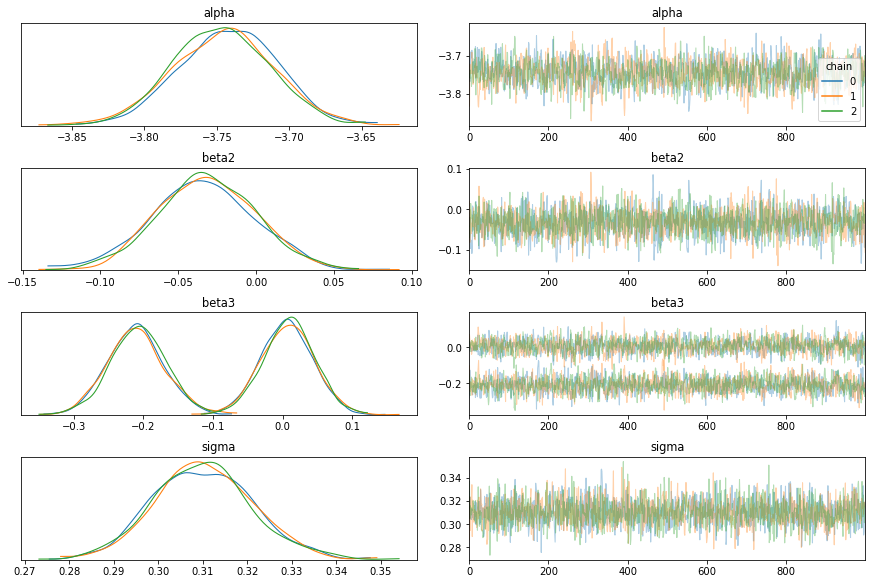

In [98]:
pm.traceplot(trace,
            combined = False,
            legend = True)

In [99]:
with basic_model:
    display(arviz.summary(trace, round_to=3))



,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-3.745,0.034,-3.810,-3.684,0.001,0.001,1355.205,1354.691,1357.196,1477.401,1.003
beta2[0],-0.032,0.032,-0.091,0.027,0.001,0.001,2079.200,1527.105,2076.417,1674.946,1.001
beta3[0],-0.210,0.041,-0.286,-0.133,0.001,0.001,1704.269,1704.269,1711.862,1940.614,1.000
beta3[1],0.007,0.038,-0.064,0.077,0.001,0.001,1640.433,1640.433,1640.839,2248.415,1.000
sigma,0.310,0.011,0.289,0.331,0.000,0.000,2332.407,2332.407,2323.136,2072.311,1.001
